# Prediction Model

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_data= pd.read_csv("UCI_HAR_dataset/csv_files/train.csv")
train_data.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [3]:
y=train_data["Activity"]
X=train_data.drop(columns=["Activity","subject","ActivityName"],axis=1,inplace = True)
X=train_data
X.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 

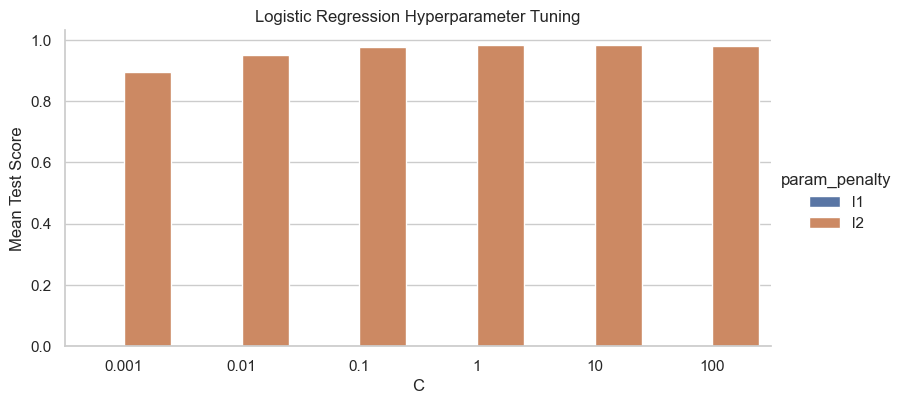

In [5]:
# define hyperparameters to tune
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]

# create an instance of Logistic Regression classifier
lr = LogisticRegression()

# create a dictionary of hyperparameter values
param_grid = {'penalty': penalty, 'C': C}

# create a GridSearchCV object
clf = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the training data
clf.fit(X_train, y_train)

# create a pandas dataframe to store the results
results = pd.DataFrame(clf.cv_results_)

# plot the results
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
sns.catplot(x='param_C', y='mean_test_score', hue='param_penalty', data=results, kind='bar', height=4, aspect=2)
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Logistic Regression Hyperparameter Tuning')
plt.show()

# Best model 

In [6]:
# Get the best hyperparameters from the grid search
best_penalty = clf.best_params_['penalty']
best_C = clf.best_params_['C']

# Create a Logistic Regression model with the best hyperparameters
best_lr = LogisticRegression(penalty=best_penalty, C=best_C)

# Train the best model on the training data
best_lr.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = best_lr.predict(X_train)
y_test_pred = best_lr.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9916680836592416
Test Accuracy: 0.9782460910944936


In [7]:
labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

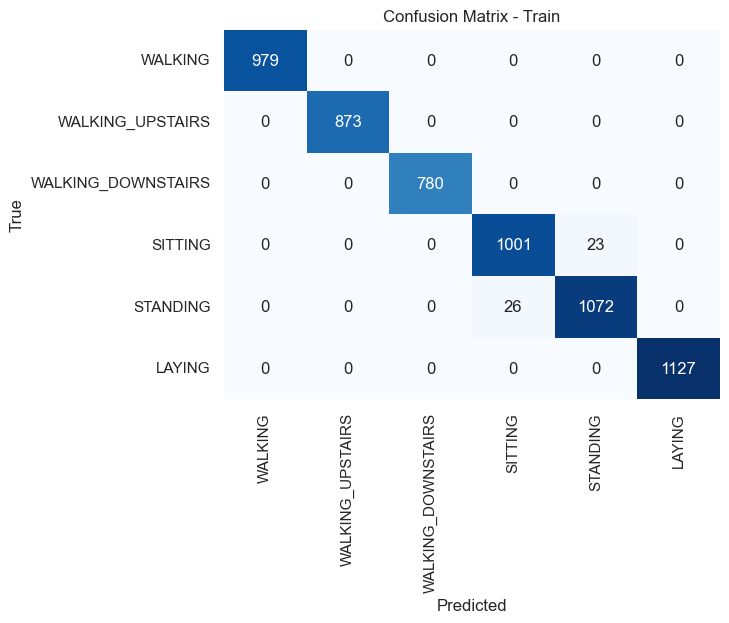

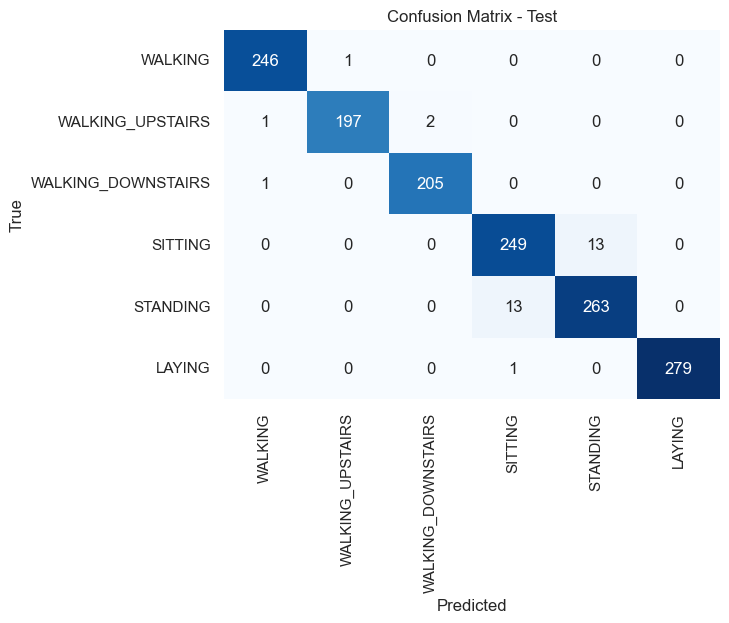

In [8]:
# Calculate and display confusion matrix with labels using seaborn
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Define class labels
class_labels = best_lr.classes_


# Plot confusion matrix for training data
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train')
plt.show()

# Plot confusion matrix for testing data
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test')
plt.show()

# Decision Tree

In [9]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# X is your feature matrix
# y is your target vector with multi-class labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter search space
param_grid = {'max_depth': np.arange(1, 11)}

# Create a Decision Tree model
dt = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_max_depth = grid_search.best_params_['max_depth']

# Create a Decision Tree model with the best hyperparameters
best_dt = DecisionTreeClassifier(max_depth=best_max_depth)

# Train the best model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9933684747491923
Test Accuracy: 0.947654656696125


# Confusion Matrix

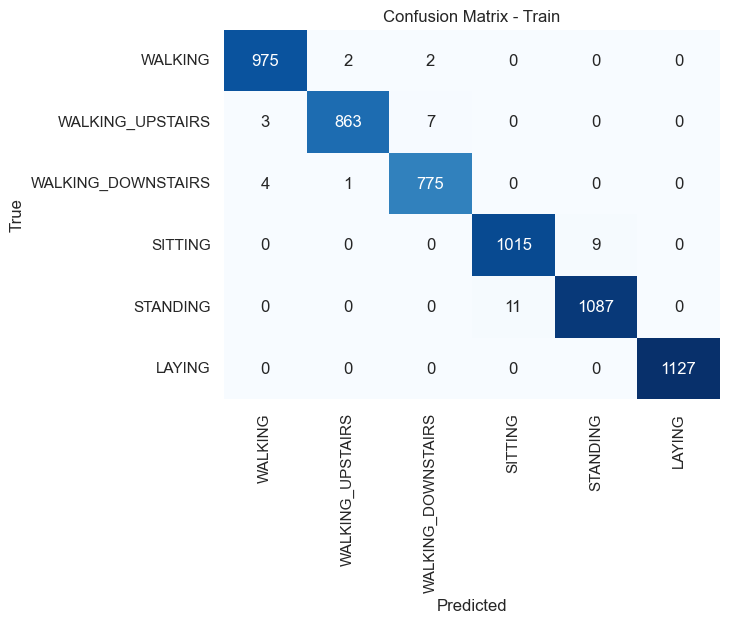

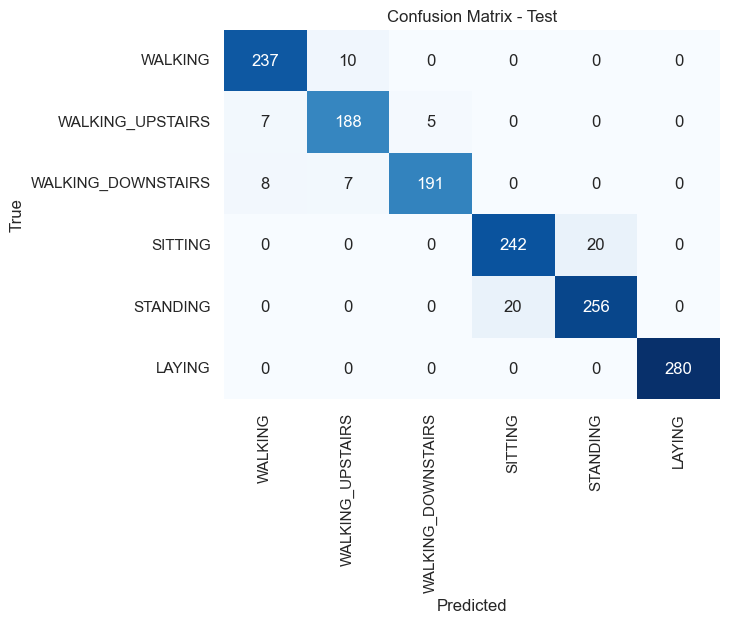

In [10]:
# Calculate and display confusion matrix with labels using seaborn
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Define class labels
class_labels = best_dt.classes_


# Plot confusion matrix for training data
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train')
plt.show()

# Plot confusion matrix for testing data
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test')
plt.show()

# Linear SVC

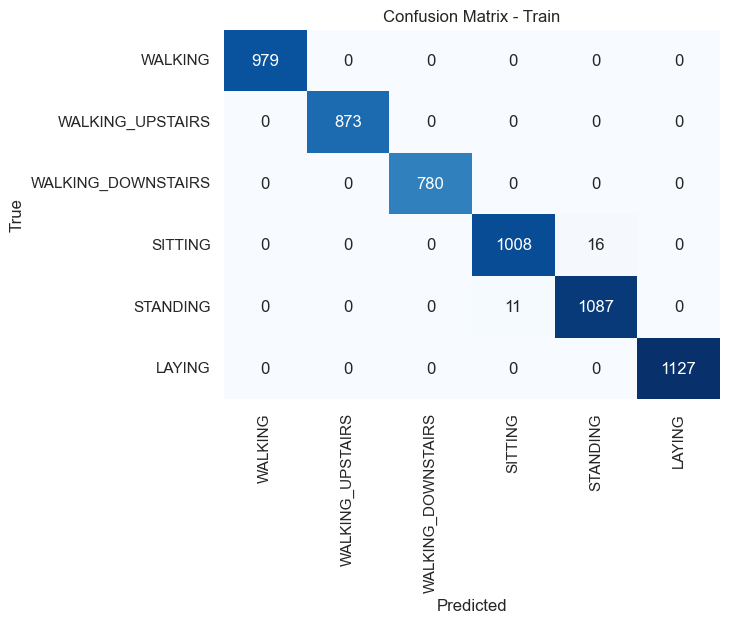

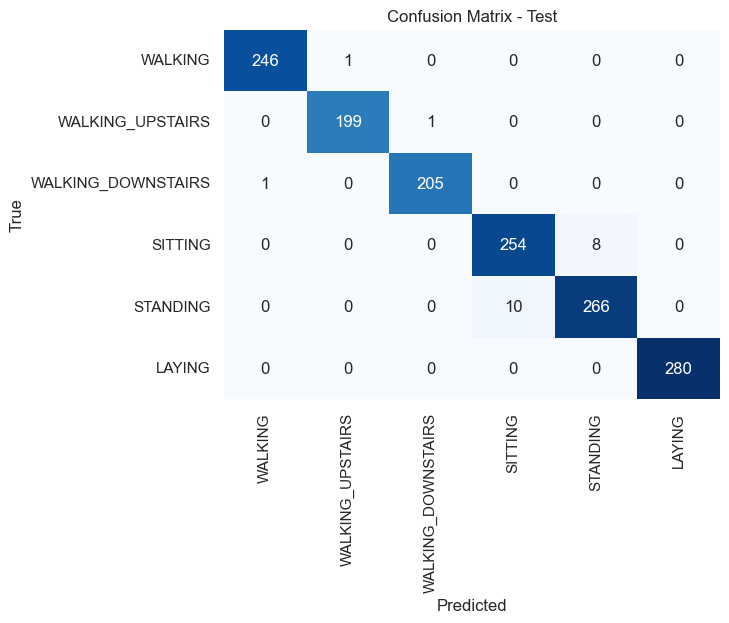

In [11]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# X is your feature matrix
# y is your target vector with multi-class labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearSVC model
svc = LinearSVC()

# Train the model on the training data
svc.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate and display confusion matrix with labels using seaborn
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Define class labels
class_labels = np.unique(y_train)

# Plot confusion matrix for training data
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train')
plt.show()

# Plot confusion matrix for testing data
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test')
plt.show()


In [12]:
# Print accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9954089440571331
Test Accuracy: 0.9857239972807614


### When compare to three predictive models *Linear SVC* has the highest accuracy